**Цель работы:**

изучение связи между признаками двумерного набора данных,
визуализация данных.

## Первичная обработка данных

### Описание предметной области

Вариант №14

Набор данных: auto2.csv
Данные о поддержанных авто:
1. имя
2. год
3. цена продажи
4. пройдено км
5. топливо
6. тип продавца
7. коробка передач
8. тип владельца 

Атрибуты: Name	year	SellingPrice	kmdriven	fuel	seller_Type	transmission	owner


### 1.Чтение файла (набора данных)

In [3]:
# импорт библиотек, чтение файла с помощью pandas
import pandas as pd
df = pd.read_csv('C:\\Users\\Максим\\Desktop\\учеба вуз\\auto2.csv', sep=',') # чтение таблицы

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

### 2. Обзор данных

##### 2.1 Вывод первых 5 строк с помощью метода head.

In [5]:
# применить метод head
df.head(5)

,Name,year,SellingPrice,kmdriven,fuel,seller_Type,transmission,owner
0,Maruti 800 AC,2007,60000.00,70000.00,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.00,50000.00,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.00,100000.00,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.00,46000.00,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.00,141000.00,Diesel,Individual,Manual,Second Owner


2.2 Оценка данных с помощью метода info.

In [6]:
# выполнит метод info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4344 non-null   object 
 1   year          4344 non-null   int64  
 2   SellingPrice  4342 non-null   float64
 3   kmdriven      4343 non-null   float64
 4   fuel          4343 non-null   object 
 5   seller_Type   4344 non-null   object 
 6   transmission  4344 non-null   object 
 7   owner         4344 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.6+ KB


2.3 Оценка данных с помощью метода describe.

In [7]:
# оцените числовые столбцы с помощью describe
df.describe()

,year,SellingPrice,kmdriven
count,4344.00,4342.00,4343.00
mean,2013.09,503998.74,66193.06
std,4.21,578446.46,46636.65
min,1992.00,20000.00,1.00
25%,2011.00,210000.00,35000.00
50%,2014.00,350000.00,60000.00
75%,2016.00,600000.00,90000.00
max,2020.00,8900000.00,806599.00


- count: Общее количество ненулевых значений в каждом столбце.
- mean: Среднее (mean) значение в столбце.
- std: Стандартное отклонение, показывающее разброс значений.
- min: Минимальное значение в столбце.
- 25%: 25-й процентиль (Q1), то есть 25 % точек данных меньше этого значения.
- 50%: Медианное значение (50-й процентиль), при котором половина точек данных находится ниже него.
- 75%: 75-й процентиль (Q3) означает, что 75 % точек данных находятся ниже этого значения.
- max: Максимальное значение в столбце.

In [8]:
 # Вывести на экран названия столбцов с помощью df.columns. Выявить проблемы с названиями, если они есть. При необходимости переименовать столбцы. Если проблемы не обнаружены также дать пояснения.
df.columns

Index(['Name', 'year', 'SellingPrice', 'kmdriven', 'fuel', 'seller_Type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
df = df.rename(columns={
    'year': 'Year',
    'SellingPrice': 'Selling_Price',
    'kmdriven': 'Total_Run',
    'fuel': 'Fuel',
    'seller_Type': 'Seller_Type',
    'transmission': 'Transmission',
    'owner': 'Owner'
})

Лишних пробелов в столбцах нет, однако названия все равно были частично изменены. Столбцы приведены к единому стилю написания через символ «_», а также полностью изменены несколько названий, чтобы они отражали логический смысл столбца.

### 3. Проверка пропусков

In [10]:
# Проверить данные на наличие пропусков и устранить их, если они есть (пропуски необходимо либо удалить, либо заменить каким-то значением).
df.isna().sum()

Name             0
Year             0
Selling_Price    2
Total_Run        1
Fuel             1
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

В числовых столбцах пропуски заполнены среднем, а с строковых наиболее часто встречающимся наименованием.

In [11]:
df['Selling_Price'] = df['Selling_Price'].fillna(df['Selling_Price'].mean())
df['Total_Run'] = df['Total_Run'].fillna(df['Total_Run'].mean())
df['Fuel'] = df['Fuel'].fillna(df['Fuel'].mode()[0])
df.isna().sum()

Name             0
Year             0
Selling_Price    0
Total_Run        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

s[0] → ищет элемент с индексом 0 (может не совпадать с порядком).

s.iloc[0] → берёт элемент по позиции (первая строка, всегда работает)

### 4. Проверка дубликатов

#### Проверка явных дубликатов

С помощью метода duplicated были найдены строки дубликаты. После эти дубликаты были удалены, а индексация обновлена. 

In [12]:
df[df.duplicated()]
# удалите дубликаты, если они есть
df = df.drop_duplicates().reset_index(drop=True)# аргумент drop, чтобы не создавать столбец index

#### Проверка неявных дубликатов

Для столбца Name проверка на уникальность значений не производилась, т.к. в нем модели машин и их огромное количество. Отличаться они могут 1-2 символами.

Были выведены уникальные значения для столбцов Fuel, Seller_Type,	Transmission, Owner. В столбце Transmission и Owner неявных дубликатов нет. А для оставшихся столбцов было выведено также сколько раз каждое значение встретилось.

In [13]:
print(df['Name'].unique()) # Поиск уникальных значений
print(df['Fuel'].unique()) # Поиск уникальных значений
print(df['Seller_Type'].unique()) # Поиск уникальных значений
print(df['Transmission'].unique()) # Поиск уникальных значений
print(df['Owner'].unique()) # Поиск уникальных значений

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
['Petrol' 'Diesel' 'Petroll' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Dealeer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [14]:
print(df["Fuel"].value_counts())
df["Seller_Type"].value_counts()

Fuel
Diesel      1801
Petrol      1719
CNG           37
LPG           22
Petroll        1
Electric       1
Name: count, dtype: int64


Seller_Type
Individual          2836
Dealer               711
Trustmark Dealer      33
Dealeer                1
Name: count, dtype: int64

Заменены неявные дубликаты. 

In [15]:
# удалите дубликаты, если они есть
df['Fuel'] = df['Fuel'].replace('Petroll', 'Petrol')
df['Seller_Type'] = df['Seller_Type'].replace('Dealeer', 'Dealer')

### 5. Провека типов данных

Для наглядности была повторно выведена информация о типах данных. Типы данных были оставлены без изменений

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           3581 non-null   object 
 1   Year           3581 non-null   int64  
 2   Selling_Price  3581 non-null   float64
 3   Total_Run      3581 non-null   float64
 4   Fuel           3581 non-null   object 
 5   Seller_Type    3581 non-null   object 
 6   Transmission   3581 non-null   object 
 7   Owner          3581 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 223.9+ KB


## Осн. часть

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Матрица диаграмм рассеяния


Для построения матрицы диаграмм рассеяния была использована функция pairplot() из библиотеки Seaborn. 
Данная функция предназначена для визуализации попарных зависимостей между числовыми признаками и позволяет одновременно отобразить распределение значений признаков и взаимосвязи между ними.

**Параметры функции**:

*hue='Transmission'* — параметр, определяющий категориальный признак, по значениям которого точки на диаграмме окрашиваются в разные цвета;

можно указать *diag_kind='hist'* — параметр, задающий тип графика на диагонали матрицы; например в данном случае гистограммы для отображения распределений признаков;

*plot_kws={'alpha': 0.6}* — словарь дополнительных параметров, где значение alpha отвечает за степень прозрачности точек на графиках (0 — полностью прозрачные, 1 — непрозрачные);

*palette='Set1'* — выбор цветовой палитры для категорий.

*height=2*,      # уменьшает размер каждого подграфика (по умолчанию 2.5)

*aspect=1*       # отношение ширины к высоте (1 = квадрат)

`После` построения графика при помощи функций *plt.suptitle()*, *plt.tight_layout()* и *plt.show()* были добавлены общий заголовок, автоматическая настройка отступов между элементами визуализации и вывод итогового изображения соответственно.

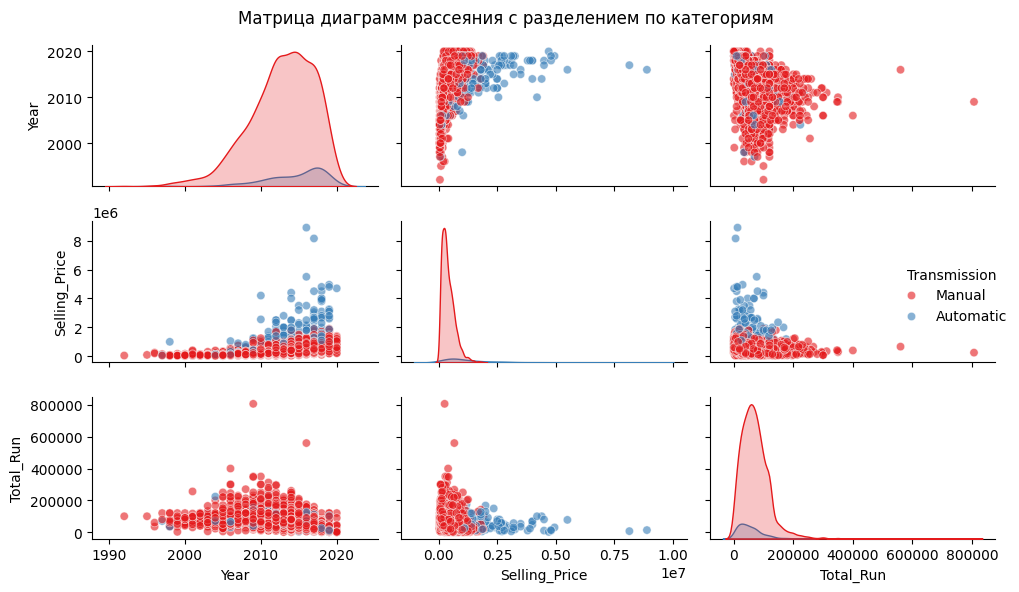

In [18]:
num_cols = ['Year', 'Selling_Price', 'Total_Run']
sns.pairplot(df[num_cols + ['Transmission']],
             hue='Transmission',
             plot_kws={'alpha': 0.6}, #делает точки полупрозрачными, чтобы лучше различались плотные скопления.
             palette='Set1',
             height=2,      # уменьшает размер каждого подграфика (по умолчанию 2.5)
             aspect=1.5)    # отношение ширины к высоте
plt.suptitle('Матрица диаграмм рассеяния с разделением по категориям')
plt.tight_layout() # автоматически подбирает отступы между графиками
plt.show()

**Выводы**

Year vs Selling_Price.
Факт: нет четкой линейной зависимости.
Красные точки (Manual/Механика) - равномерно разбросаны по всем годам и в стоят до 2000к. Год незначительно влияет на повышение цены.
Синие точки (Automatic) - стоят на порядок дороже чем Механика, и чем новее год, тем выше цена.

Year vs Total_Run.
Факт: Полный хаос, никакой зависимости.
Точки равномерно заполняют всё пространство.
Старые и новые автомобили имеют как маленький, так и огромный пробег.
Вывод: нет корреляции

Ключевые наблюдения:
Automatic (синие) - действительно в среднем дороже, но их значительно меньше.
Manual (красные) - доминируют на графике, разброс по всем параметрам.
Данные очень зашумленные - четких зависимостей действительно не видно.
Больше всего точек сосредоточено в области: 2010-2020 годы, цена 0-4000к, пробег 0-200к.
График показывает отсутствие сильных линейных зависимостей между переменными. Данные слишком разбросаны, чтобы делать уверенные выводы о корреляциях. 

#### Гистограммы

Для построения гистограмм была создана сетка графиков размером 2×2 с помощью функции *plt.subplots()* из библиотеки Matplotlib. Данный приём позволяет отобразить несколько графиков на одной фигуре, обеспечивая компактное и удобное сравнение распределений различных признаков. Параметр *figsize=(14, 6)* задаёт размеры всей фигуры, а функция *fig.suptitle()* формирует общий заголовок для всех подграфиков, отражающий суть визуализации.

Для каждого числового признака была построена отдельная гистограмма с помощью метода *hist()*. Гистограмма показывает распределение значений признака, то есть частоту появления наблюдений в определённых диапазонах. Каждое значение признака попадает в один из интервалов (bins), и высота столбца отражает количество наблюдений, принадлежащих этому интервалу.

В параметрах функции *hist()* были заданы следующие настройки:

*bins* — количество интервалов, на которые делится диапазон значений. Подбор этого параметра позволяет сделать распределение более наглядным: слишком малое значение приводит к потере деталей, слишком большое — к шумности графика;

*color* — цвет столбцов гистограммы, для визуального различия между графиками;

*edgecolor='black'* — задаёт чёрную границу столбцов;

*alpha=0.7* — определяет степень прозрачности столбцов, позволяя визуально смягчить цвет и сделать график менее перегруженным.

Для каждого подграфика дополнительно указаны подписи осей (set_xlabel, set_ylabel) и заголовок (set_title), отражающие смысл отображаемого признака. Команда grid(axis='y', alpha=0.3) добавляет горизонтальную сетку для облегчения восприятия частотных значений.

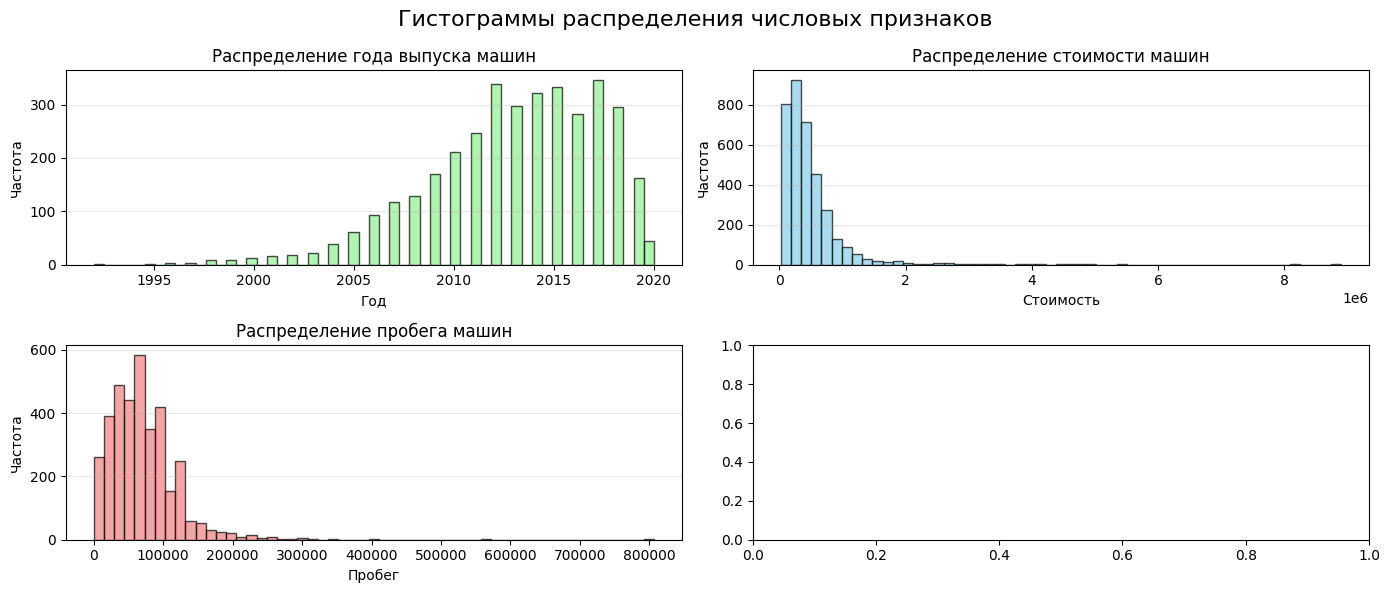

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
fig.suptitle('Гистограммы распределения числовых признаков', fontsize=16)

axes[0, 0].hist(df['Year'], bins=55, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение года выпуска машин')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].hist(df['Selling_Price'], bins=55, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Стоимость')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение стоимости машин')
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].hist(df['Total_Run'], bins=55, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Пробег')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение пробега машин')
axes[1, 0].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

##### 1. Распределение года выпуска машин

**Основные выводы:** 
2012-2015 годы - пик продаж автомобилей.
Распределение смещено вправо - больше данных по новым автомобилям.
От примерно 1995 до 2020 года.
Резкий рост с 2005 года, пик в 2015-2018, затем спад.
На рынке преобладают относительно новые автомобили (5-10 лет), что характерно для рынка подержанных авто.

##### 2. Распределение стоимости машин

**Основные выводы:**
Большинство автомобилей очень дешевые 0-500к. 80-90% автомобилей стоят до 2000к.
Длинный хвост(выбросы) - Единичные очень дорогие экземпляры до 9000к

##### 3. Распределение пробега машин
**Основные выводы:**
Большая часть автомобилей с пробегом до 100к. Наиболее частое значение 60-80к.

##### Общие выводы по данным:
Преобладают недорогие автомобили.
В основном автомобили 2010-2020 годов выпуска.
Наличие очень дорогих автомобилей искажает статистику.


#### Анализ корреляций

##### Корреляция

*df[num_cols]* — из датафрейма выбирается подтаблица только с числовыми столбцами

*.corr()* — метод pandas, который вычисляет матрицу корреляций между всеми парами выбранных числовых признаков. По умолчанию используется коэффициент Пирсона.
На выходе получается квадратная таблица (DataFrame) размера n×n, где n — число числовых признаков.
Диагональ матрицы содержит 1.0 (корреляция признака с самим собой).Элементы выше/ниже диагонали — это значения корреляции для пар признаков, лежащие в диапазоне [-1, 1].

In [20]:
correlation_matrix = df[num_cols].corr()

Создаётся новая фигура Matplotlib размером 6×6 c помощью *plt.figure*. Это задаёт пространство, в котором будет рисоваться тепловая карта.

Ключевая команда — *sns.heatmap* строит тепловую карту по матрице корреляций. С параметрами:

*correlation_matrix* — входные данные (матрица корреляций).

*annot=True* — в каждой ячейке карты будет отображено числовое значение (аннотация) — сам коэффициент корреляции.

*fmt='.3f'* — формат вывода аннотаций: три знака после запятой (например, 0.873).

*cmap='coolwarm'* — цветовая карта (colormap). В coolwarm положительные значения окрашиваются в тёплые тона (красные), отрицательные — в холодные (синие). Это делает направление корреляции визуально очевидным.

*center=0* — центрирование цветовой шкалы по нулю. Это важно: ноль будет нейтрального цвета, положительные и отрицательные отклонения окрашены симметрично.

*square=True* — все ячейки будут квадратными.

*linewidths=1* — толщина линий-разделителей между ячейками (в пикселях/единицах Matplotlib). Такие линии помогают визуально разграничивать ячейки.

*cbar_kws={"shrink": 0.6}* — дополнительные параметры для полосы цветовой шкалы (colorbar). Указан shrink=0.8, что уменьшает высоту полосы до 80% для более аккуратного размещения.

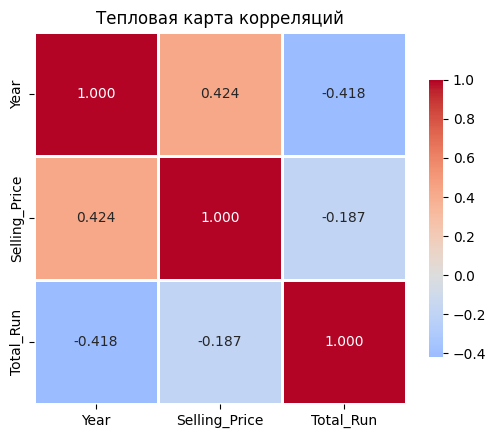

In [21]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.6})
plt.title('Тепловая карта корреляций') 
plt.show()

##### Ковариация
Метод *.cov()* вычисляет ковариационную матрицу — таблицу, показывающую, как пары числовых признаков совместно изменяются.
Каждый элемент матрицы — это ковариация между двумя признаками.

Если ковариация положительная, это значит, что оба признака растут или уменьшаются вместе.

Если отрицательная — когда один увеличивается, другой, как правило, уменьшается.

Если значение близко к нулю — связи между изменениями почти нет.

На диагонали матрицы находятся дисперсии (ковариация признака с самим собой). Дисперсия - это показатель разброса данных вокруг их среднего значения. Она показывает, насколько значения отклоняются от среднего арифметического

In [22]:
covariance_matrix = df[num_cols].cov()
covariance_matrix

,Year,Selling_Price,Total_Run
Year,18.07,917833.65,-84444.01
Selling_Price,917833.65,259153809025.01,-4539593598.27
Total_Run,-84444.01,-4539593598.27,2262571395.51


**Выводы**

Анализ тепловой карты корреляций:
Year vs Selling_Price: 0.424
Умеренная положительная связь.
Чем новее автомобиль, тем дороже

Year vs Total_Run: -0.418
Умеренная отрицательная связь.
Чем новее автомобиль, тем меньше пробег

Selling_Price vs Total_Run: -0.187
Слабая отрицательная связь.
Чем больше пробег, тем немного дешевле автомобиль

Анализ таблицы ковариации:

Дисперсия (ковариация признака с самим собой) - это "разброс" данных:
Year: 18.07 - небольшой разброс (годы от 1992 до 2020)
Selling_Price: 259,153,809,025 - ОГРОМНЫЙ разброс (цены от 20к до 8.9 млн)
Total_Run: 2,262,571,395.51 - большой разброс (пробег от 1 до 806к км)

Ковариации между признаками:
Year-Selling_Price: +917,833.65 - положительная связь
Year-Total_Run: -84,444.01 - отрицательная связь
Selling_Price-Total_Run: -4,539,593,598.27 - отрицательная связь

Ковариация - "сырая" взаимосвязь
Показывает НАПРАВЛЕНИЕ связи (+ или -).
Но величина зависит от ЕДИНИЦ ИЗМЕРЕНИЯ.
Огромные числа - потому что цены в рублях, пробег в км

Корреляция - "нормализованная" взаимосвязь.
Безразмерная величина от -1 до +1.
Показывает СИЛУ связи независимо от единиц

**Задание 1 :** Использовать seaborn. По группировке - fuel и количество машин
каждого типа коробки передач (transmission) построить диаграмму следующего
вида:

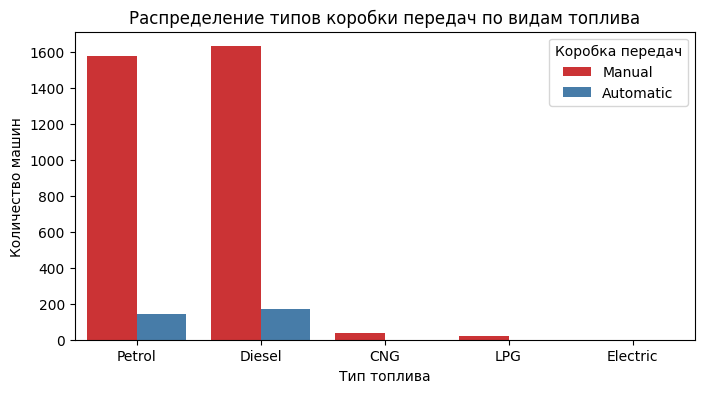

In [23]:
# Построение графика
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Fuel', hue='Transmission', palette='Set1')

plt.title('Распределение типов коробки передач по видам топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Количество машин')
plt.legend(title='Коробка передач')
plt.show()

**Выводы**

Для бензиновых и дизельных автомобилей абсолютно преобладают механические коробки передач, причем у бензиновых машин разница даже более значительная. Автоматические коробки встречаются существенно реже во всех категориях топлива. Среди альтернативных видов топлива like CNG и LPG автоматические коробки полностью отсутствуют. По электрическим автомобилям сложно делать выводы о тенденциях т.к. всего 1 автомобиль. В целом по всему рынку подержанных автомобилей явно доминируют машины с механической трансмиссией, особенно среди традиционных видов топлива.

**Задание 2:** Использовать pandas и plot. По сводной таблице (pivot_table) -
отобразить среднее количество пройденных километров (kmdriven) по типу
продавца. Оставить только маркеры в виде × красного цвета размером 14.

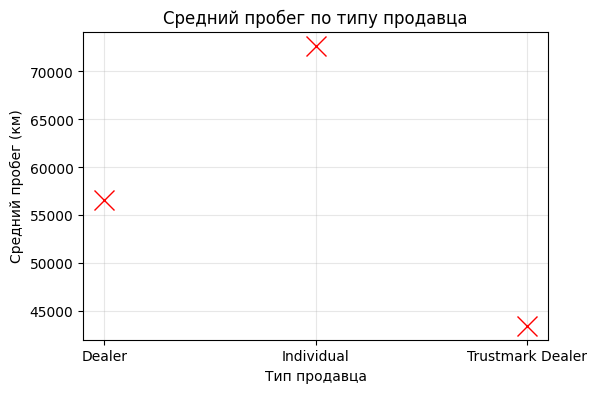

In [29]:
# Создаем сводную таблицу с средним пробегом по типу продавца
pivot_df = pd.pivot_table(df, values='Total_Run', index='Seller_Type', aggfunc='mean')

# Строим график с красными маркерами ×
plt.figure(figsize=(6, 4))
plt.plot(pivot_df.index, pivot_df['Total_Run'], 'rx', markersize=14)

plt.title('Средний пробег по типу продавца')
plt.xlabel('Тип продавца')
plt.ylabel('Средний пробег (км)')
plt.grid(True, alpha=0.3)
plt.show()

**Выводы**

Анализируя график среднего пробега по типу продавца, видно что машины от частных продавцов (Individual) имеют наибольший средний пробег, значительно превышающий показатели дилеров. Дилеры (Dealer) демонстрируют средние значения пробега, а доверенные дилеры (Trustmark Dealer) имеют наименьший средний пробег среди всех категорий. Это логично, поскольку частные владельцы обычно используют машины дольше перед продажей, а доверенные дилеры предлагают наиболее свежие и малоиспользованные автомобили.

**Задание 3:** Использовать matplotlib. Отфильтровать данные и выбрать год
выпуска старше 2000. Построить круговую диаграмму, которая отображает
процент каждого типа владельца (owner). 

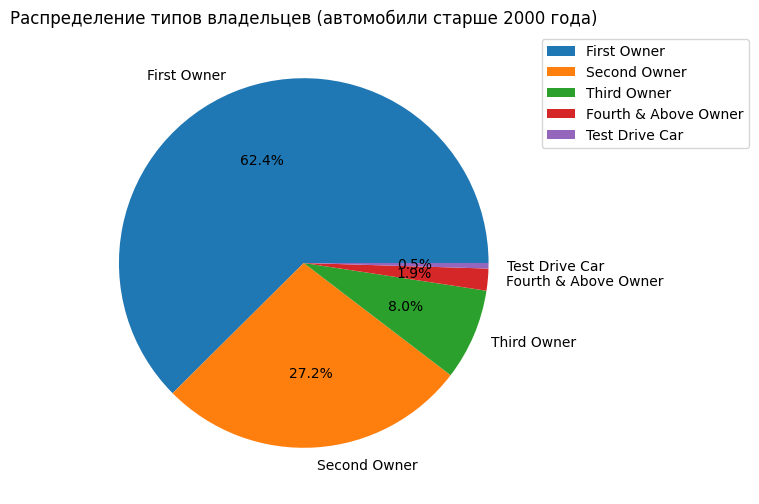

In [33]:
# Фильтрация данных - год выпуска старше 2000
filtered_df = df[df['Year'] > 2000]

# Подсчет количества каждого типа владельца
owner_counts = filtered_df['Owner'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(owner_counts.values, labels=owner_counts.index, autopct='%1.1f%%')
plt.title('Распределение типов владельцев (автомобили старше 2000 года)')
plt.legend(owner_counts.index, fontsize=10, bbox_to_anchor=(1, 1))
plt.show()

**Выводы**

Анализируя круговую диаграмму распределения типов владельцев для автомобилей старше 2000 года, видно что абсолютно преобладают автомобили с первым владельцем (62.5%), что составляет большую часть рынка. На втором месте автомобили со вторым владельцем (27.2%), затем с третьим владельцем (8.0%). Автомобили с четвертым и более владельцами составляют всего 1.9%, а тестовые автомобили - лишь 0.5%. Это показывает что на рынке в основном представлены автомобили с одним-двумя владельцами, что повышает их привлекательность для покупателей.

#### График типа hexagonal binning plot


Создаётся объект фигуры (fig) и объект координатных осей (ax) размером 8×6 дюймов. На этих осях далее строится график.

Функция *plt.subplots()* создаёт "пару" объектов:

*fig* — это вся фигура, то есть область холста, где размещаются графики.

*ax* — это объект осей (axes), то есть конкретная система координат, на которой строится график.

*ax.hexbin()* строит шестигранную диаграмму плотности (Hexbin Plot) — разновидность точечной диаграммы, где пространство разбивается на шестиугольники (ячейки), и в каждом шестиугольнике подсчитывается количество точек (наблюдений), попавших внутрь.

Этот тип графика используется, когда данных много, и обычный scatter-plot превращается в “облако” из наложенных точек.

Параметры:

*df['...']* — значения по оси X.

*df['...']* — значения по оси Y.

*gridsize=25* — задаёт размер сетки (число шестиугольников вдоль одной оси). Чем больше значение, тем мельче ячейки и тем точнее визуализация плотности.

*cmap='Greens'* — цветовая схема. Более насыщенный зелёный цвет показывает области с большим количеством наблюдений.

*mincnt=1* — ячейки с количеством точек меньше 1 не отображаются (то есть показываются только зоны, где есть хотя бы одно наблюдение).

*colorbar* — поясняет, что оттенок цвета соответствует числу поездок, попавших в каждую ячейку.

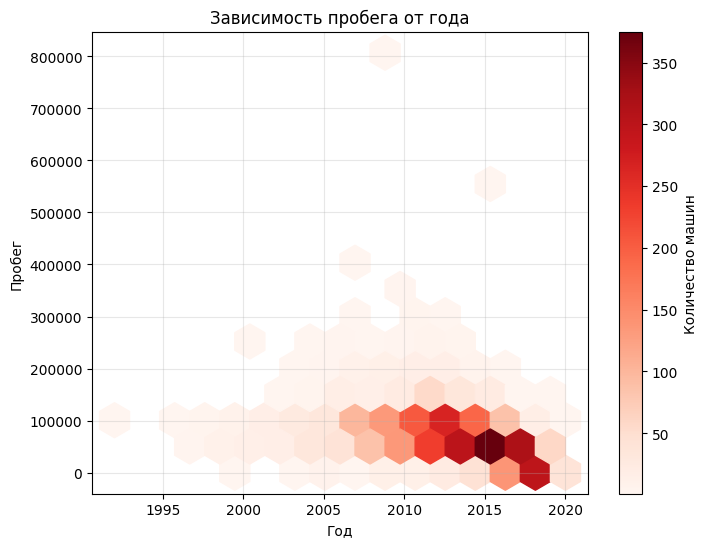

In [225]:
fig, ax = plt.subplots(figsize=(8, 6))

hexbin = ax.hexbin(df['Year'],
                   df['Total_Run'],
                   gridsize=15,
                   cmap='Reds',
                   mincnt=1)

ax.set_xlabel('Год',)
ax.set_ylabel('Пробег')
ax.set_title('Зависимость пробега от года')
ax.grid(True, alpha=0.3) #сетка

cb = plt.colorbar(hexbin, ax=ax)
cb.set_label('Количество машин')

**Выводы**

На графике наблюдается слабая зависимость между годом выпуска и пробегом автомобиля. С 2010 по 2020 год чем новее автомобиль, тем меньше у него пробег, что логично и соответствует ожиданиям. С 2000 по 2010 же наоборот с каждым новым годом пробег немного рос. Самая высокая концентрация автомобилей сосредоточена в области 2010-2018 годов с пробегом до 100000 км. При этом есть заметная группа относительно новых автомобилей с аномально высоким пробегом, что может быть связано с такси или коммерческим использованием. 

#### Диаграммы размаха (Boxplot)

Базовый Boxplot для стоимости поездки
Основная команда *plt.boxplot()* строит ящик с усами по данным из столбца 'Selling_Price' — стоимости поездки.

Параметры: *df['...']* — данные, которые анализируются.

*vert=False* — строит горизонтальный boxplot (ящик лежит горизонтально).

*widths=0.5* — задаёт толщину (высоту) ящика.

*patch_artist=True* — разрешает раскрашивать ящик цветом (по умолчанию boxplot прозрачный).

Параметры оформления: *boxprops=dict(facecolor='lightblue', alpha=0.7)* — цвет заливки ящика голубой с прозрачностью 0.7.

*medianprops=dict(color='red', linewidth=2)* — медиана выделена красной линией толщиной 2.

*whiskerprops=dict(color='black', linewidth=1.5)* — “усы” чёрного цвета.

*capprops=dict(color='black', linewidth=1.5)* — “крышечки” на концах усов тоже чёрные.

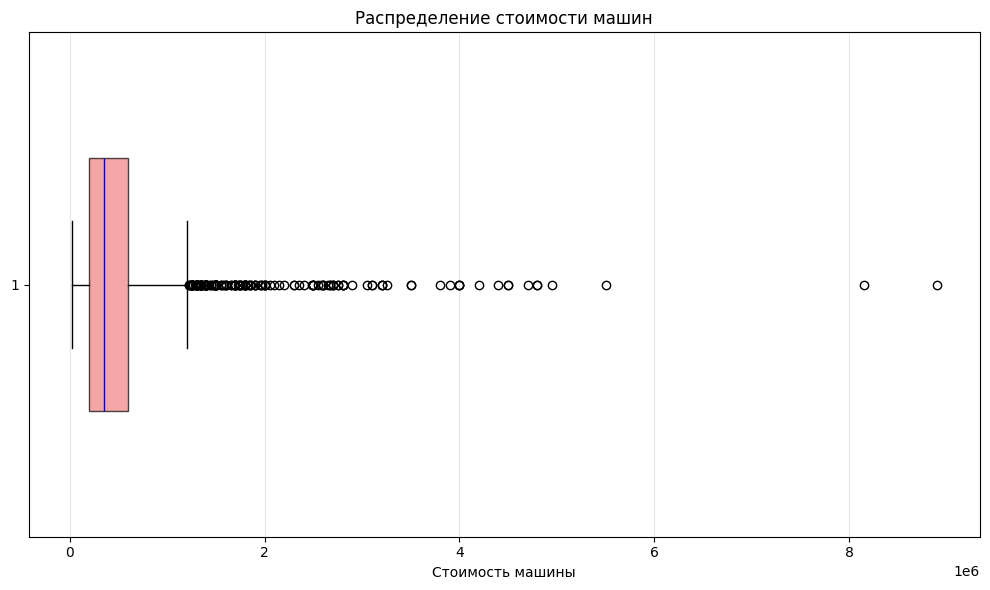

In [238]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(df['Selling_Price'],
                  vert=False,
                  widths=0.5,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightcoral', alpha=0.7),
                  medianprops=dict(color='blue'))

plt.xlabel('Стоимость машины')
plt.title('Распределение стоимости машин')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Выводы**

Анализируя график распределения стоимости машин, видно явное правостороннее смещение распределения. Подавляющее большинство автомобилей сосредоточено в диапазоне низких цен от 0 до 2000к, при этом пик приходится на самый дешевый сегмент. По мере увеличения цены количество автомобилей резко уменьшается, образуя длинный хвост распределения в правой части графика. Это типичная картина для рынка подержанных автомобилей, где преобладают недорогие предложения, а дорогие автомобили составляют небольшую долю рынка. Распределение явно не является нормальным и имеет сильную положительную асимметрию(для себя - чтобы не забыть - это когда большинство данных сконцентрировано слева (на низких значениях), а длинный "хвост" распределения тянется вправо к высоким значениям).

#### Создание категорий по цене и Boxplot по новым категориям

Для начала происходит определение границ интервалов.
Создаётся список границ интервалов (bins), по которым значения price будут разделены на категории.
0 — нижняя граница (самые дешёвые машины).

*df['...'].quantile(0.33)* — 33-й перцентиль: значение, ниже которого находится 33% всех машин (то есть граница между «низкой» и «средней» ценой).

*df['...'].quantile(0.67)* — 67-й перцентиль: граница между «средней» и «высокой» ценой.

*df['...'].max()* — верхняя граница.

Таким образом, диапазон стоимости делится на три части:

от 0 до 33-го перцентиля — низкая стоимость;
от 33-го до 67-го — средняя;
выше 67-го — высокая.

Далее происходит разбиение данных по категориям с помощью метода *.cut*.
Это функция из библиотеки pandas, которая «режет» числовую переменную на интервалы (bins) и создаёт категориальный столбец.

Параметры:

*df['...']* — признак, который разбивается.

*bins=price_bins* — границы интервалов

*labels=price_labels* — названия категорий

*include_lowest=True* — гарантирует, что минимальные значения попадут в первый интервал.

In [36]:
price_bins = [0,
              df['Selling_Price'].quantile(0.33),
              df['Selling_Price'].quantile(0.67),
              df['Selling_Price'].max()]
price_labels = ['Низкая', 'Средняя', 'Высокая']
df['price_category'] = pd.cut(df['Selling_Price'],
                                     bins=price_bins,
                                     labels=price_labels,
                                     include_lowest=True)

df['price_category'].value_counts().sort_index()

price_category
Низкая     1259
Средняя    1185
Высокая    1137
Name: count, dtype: int64

In [34]:
df.head()

,Name,Year,Selling_Price,Total_Run,Fuel,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000.00,70000.00,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.00,50000.00,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.00,100000.00,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.00,46000.00,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.00,141000.00,Diesel,Individual,Manual,Second Owner


Для каждой ценовой категории строится отдельный boxplot, показывающий:

медиану (центральную красную или чёрную линию внутри ящика);

границы 25% и 75% (нижняя и верхняя стенки ящика);

“усы” — диапазон типичных значений;

выбросы — отдельные точки за пределами усов.

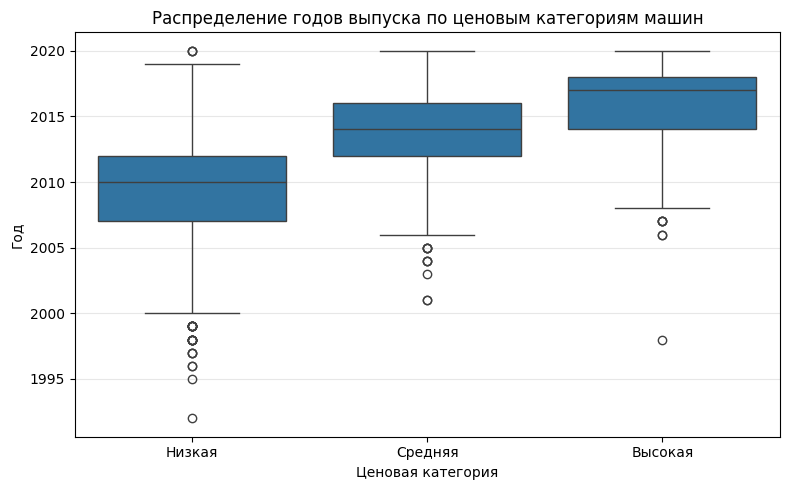

In [181]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='price_category', y='Year')
plt.xlabel('Ценовая категория')
plt.ylabel('Год')
plt.title('Распределение годов выпуска по ценовым категориям машин')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Выводы**

Анализируя график распределения годов выпуска по ценовым категориям, видна четкая зависимость: чем новее автомобиль, тем выше его ценовая категория. В группе низкой цены преобладают старые автомобили выпуска до 2010 года. Средняя ценовая категория состоит в основном из автомобилей 2015 годов выпуска. Высокая ценовая категория практически полностью представлена новыми автомобилями 2015-2020 годов. Боксилоты показывают что медианный год выпуска последовательно увеличивается от низкой к высокой ценовой категории что логично и ожидаемо.

#### Boxplot по существующим категориям

Создаёт список массивов величин — отдельно для каждой категории. То есть *run_data[0]* содержит все пробеги категории first owner, *run_data[1]* — second owner и т.д.

метод *.boxplot* строит boxplot — график, показывающий распределение данных: медиану, квартильный размах и выбросы. Параметры отвечают за оформление:

*patch_artist=True* — заливает прямоугольники цветом;

*boxprops* — задаёт стиль “ящика” (цвет, прозрачность);

medianprops — цвет и толщина линии медианы;

whiskerprops, capprops — стиль “усов” и ограничителей;

flierprops — вид точек-выбросов.

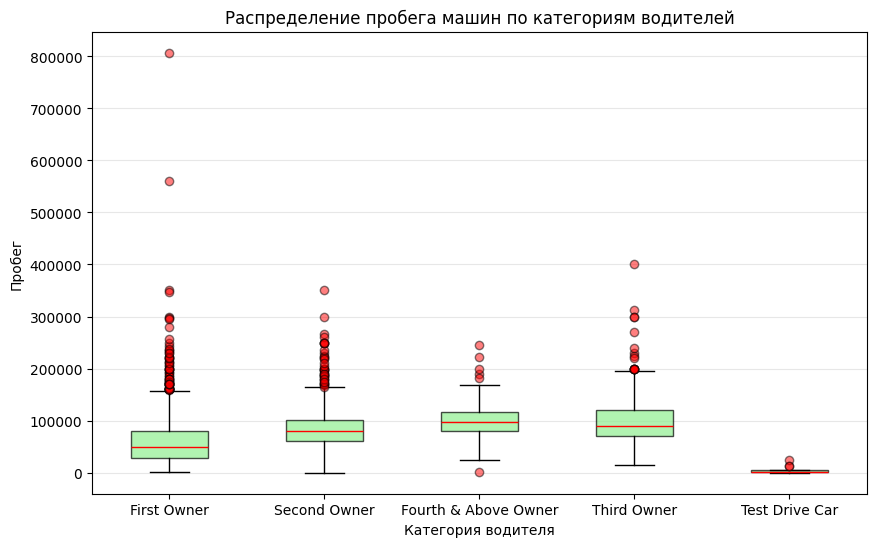

In [237]:
categories = df['Owner'].unique()

run_data = [df[df['Owner'] == cat]['Total_Run'].values for cat in categories]

plt.figure(figsize=(10, 6))

box = plt.boxplot(run_data,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightgreen', alpha=0.7),
                  medianprops=dict(color='red'),
                  flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))

plt.xticks(range(1, len(categories) + 1), categories)
plt.xlabel('Категория водителя')
plt.ylabel('Пробег')
plt.title('Распределение пробега машин по категориям водителей')
plt.grid(axis='y', alpha=0.3)
plt.show()

**Выводы**

Анализируя график распределения пробега по категориям владельцев, видна четкая закономерность: чем больше было владельцев у автомобиля, тем выше его средний пробег. Автомобили с первым владельцем имеют наименьший разброс пробега и самые низкие медианные значения. У второго владельца пробег уже значительно выше, а у третьего и последующих владельцев наблюдаются максимальные значения пробега с большим разбросом данных. Тестовые автомобили имеют очень низкий пробег, что логично.

Аналогичным образом строим распределение стоимости машин по категориям водителей

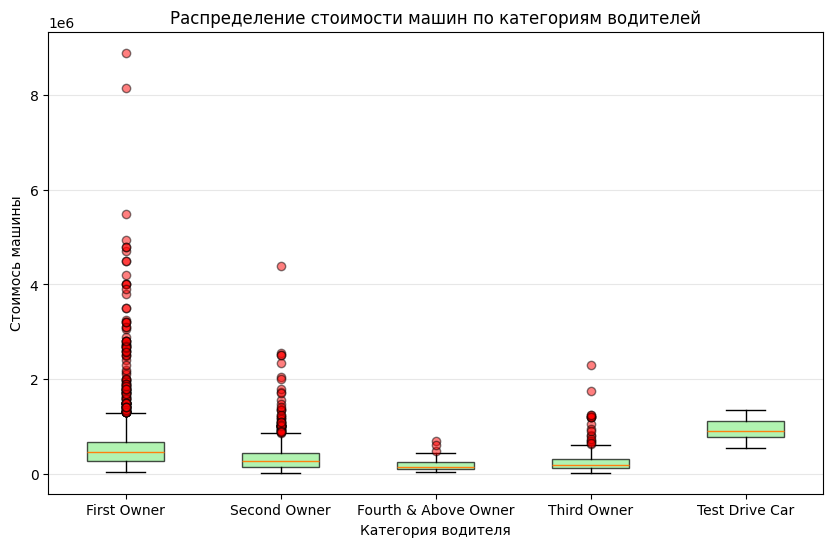

In [251]:
categories = df['Owner'].unique()

price_data = [df[df['Owner'] == cat]['Selling_Price'].values for cat in categories]
plt.figure(figsize=(10, 6))

box = plt.boxplot(price_data,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightgreen', alpha=0.7),
                  flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))

plt.xticks(range(1, len(categories) + 1), categories)
plt.xlabel('Категория водителя')
plt.ylabel('Стоимось машины')
plt.title('Распределение стоимости машин по категориям водителей')
plt.grid(axis='y', alpha=0.3)
plt.show()

**Выводы**

Анализируя график распределения стоимости по категориям владельцев, видно что автомобили с первым владельцем имеют самый широкий разброс цен от самых дешевых до самых дорогих включая большинство выбросов в премиальном сегменте. Автомобили со вторым и третьим владельцами сосредоточены в среднем и низком ценовом диапазоне с меньшим разбросом стоимости. Машины с четвертым и более владельцами а также тестовые автомобили имеют наиболее низкую медианную стоимость и минимальный разброс цен. Чем больше было владельцев у автомобиля тем в более низком ценовом сегменте он находится.

## Вывод

На основе проведенного комплексного анализа данных о подержанных автомобилях можно сформулировать следующие выводы:

Рынок поддержанных автомобилей представляет собой классический пример асимметричного распределения с ярко выраженной правосторонней смещенностью. Основная масса предложений сосредоточена в сегменте бюджетных автомобилей стоимостью до 2000к, что свидетельствует о массовом характере рынка и преобладании доступных транспортных средств для широкого круга потребителей. При этом наличие длинного "хвоста" распределения в области высоких цен указывает на присутствие премиального сегмента, хотя его доля незначительна.

Выявлена устойчивая система взаимосвязей между основными параметрами автомобилей. Наиболее сильная корреляция наблюдается между годом выпуска и стоимостью (0.424), что подтверждает базовый принцип автомобильного рынка - новизна является ключевым ценообразующим фактором. Отрицательная корреляция между годом выпуска и пробегом (-0.418) логично отражает естественный процесс эксплуатации транспортных средств. Слабая связь между пробегом и стоимостью (-0.187) свидетельствует о том, что пробег является второстепенным фактором при оценке автомобиля по сравнению с его возрастом.

Распределение по количеству владельцев демонстрирует здоровую структуру рынка: 62.5% автомобилей имеют только одного владельца, что указывает на хорошее качество предложения и повышает доверие покупателей. Последовательное увеличение пробега и снижение стоимости с ростом числа владельцев образует четкую иерархию, соответствующую логике эксплуатации и естественного старения автомобиля.

Доминирование механических коробок передач (особенно среди бензиновых и дизельных автомобилей) отражает как исторически сложившуюся структуру автопарка, так и вероятно более низкую стоимость владания такими транспортными средствами. Исключение составляют электромобили.

Четкое разделение по ценовым категориям в зависимости от года выпуска формирует понятную для потребителя структуру рынка. Низкий ценовой сегмент представлен в основном автомобилями до 2010 года выпуска, средний сегмент - автомобилями 2005-2015 годов, а высокий ценовой сегмент практически полностью состоит из автомобилей не старше 2015 года. Это создает прозрачную систему координат для покупателей с разным бюджетом.

### Практическая значимость анализа

Полученные результаты имеют практическую ценность для различных участников рынка: покупатели могут ориентироваться на выявленные закономерности при выборе автомобиля, продавцы - лучше понимать ценностное позиционирование своих предложений, а аналитики - использовать выявленные зависимости для построения прогнозных моделей и разработки стратегий ценообразования.

В целом, рынок характеризуется логичной и предсказуемой структурой с четкими взаимосвязями между ключевыми параметрами, что делает его достаточно прозрачным для анализа и принятия взвешенных решений.